In [1]:
from datetime import datetime, timedelta

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#(Daily % of underlying total return index) * X - ER/250 - (X - 1) * (1 month LIBOR) * 
#(Current date - previous date)/360

start_date = "1986-01-03"
start_date_extra = "1986-01-02"
##start_date = "2010-01-03"
#start_date_extra = "2010-01-02"
end_date = "2021-10-01"
expense_ratio = 0.0095
leverage = 3


df_libor = pd.read_csv("USD1MTD156N.csv")
df_libor.rename(columns={"DATE":"Date", "USD1MTD156N":"Value"}, inplace=True)
df_libor.set_index("Date",  inplace=True)
df_libor.index = pd.to_datetime(df_libor.index)
df_libor = df_libor[df_libor.Value != '.']
df_libor = df_libor.loc[start_date_extra:end_date]
df_libor.Value = pd.to_numeric(df_libor.Value)
#df_libor.USD1MTD156N = pd.to_numeric(df_libor.USD1MTD156N)
#df_libor.DATE = pd.to_datetime(df_libor.DATE)
df_tqqq_real = pd.read_csv("TQQQ.csv", index_col = "Date")
df_tqqq_real = df_tqqq_real.loc[start_date:end_date]
df_tqqq_real.index = pd.to_datetime(df_tqqq_real.index)
print(df_tqqq_real)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):

    df_ndq = pd.read_csv("^IXIC.csv", index_col = "Date")
    df_ndq = df_ndq.loc[start_date_extra:end_date]
    df_ndq.index = pd.to_datetime(df_ndq.index)
    df_ndq = df_ndq.loc[df_ndq.index.isin(df_libor.index)]
    df_libor = df_libor.loc[df_libor.index.isin(df_ndq.index)]
    returns = pd.DataFrame(df_ndq["Close"].pct_change(1))
    returns = returns.loc[returns.index.isin(df_libor.index)]
    print(returns)
    dates = df_ndq.index
    datesdiff = pd.DataFrame((dates[1:] - dates[:-1])/np.timedelta64(1, "D"));
    datesdiff.index = df_ndq[1:].index;
    print(datesdiff)
    print(df_libor)



                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-02-11    0.813750    0.869792    0.811146    0.865104    0.862942   
2010-02-12    0.841563    0.876146    0.836667    0.868646    0.866475   
2010-02-16    0.889063    0.904375    0.875104    0.902292    0.900037   
2010-02-17    0.914375    0.917813    0.900625    0.917604    0.915311   
2010-02-18    0.916667    0.940521    0.911146    0.935000    0.932663   
...                ...         ...         ...         ...         ...   
2021-09-27  138.210007  139.399994  135.399994  138.369995  138.369995   
2021-09-28  133.139999  133.889999  126.070000  126.830002  126.830002   
2021-09-29  127.959999  130.289993  125.300003  125.989998  125.989998   
2021-09-30  127.779999  129.539993  124.080002  124.570000  124.570000   
2021-10-01  125.250000  128.009995  120.839996  126.839996  126.839996   

              Volume  
Date          

            Date
Date            
1986-01-03   1.0
1986-01-06   3.0
1986-01-07   1.0
1986-01-08   1.0
1986-01-09   1.0
1986-01-10   1.0
1986-01-13   3.0
1986-01-14   1.0
1986-01-15   1.0
1986-01-16   1.0
1986-01-17   1.0
1986-01-20   3.0
1986-01-21   1.0
1986-01-22   1.0
1986-01-23   1.0
1986-01-24   1.0
1986-01-27   3.0
1986-01-28   1.0
1986-01-29   1.0
1986-01-30   1.0
1986-01-31   1.0
1986-02-03   3.0
1986-02-04   1.0
1986-02-05   1.0
1986-02-06   1.0
1986-02-07   1.0
1986-02-10   3.0
1986-02-11   1.0
1986-02-12   1.0
1986-02-13   1.0
1986-02-14   1.0
1986-02-18   4.0
1986-02-19   1.0
1986-02-20   1.0
1986-02-21   1.0
1986-02-24   3.0
1986-02-25   1.0
1986-02-26   1.0
1986-02-27   1.0
1986-02-28   1.0
1986-03-03   3.0
1986-03-04   1.0
1986-03-05   1.0
1986-03-06   1.0
1986-03-07   1.0
1986-03-10   3.0
1986-03-11   1.0
1986-03-12   1.0
1986-03-13   1.0
1986-03-14   1.0
1986-03-17   3.0
1986-03-18   1.0
1986-03-19   1.0
1986-03-20   1.0
1986-03-21   1.0
1986-03-24   3.0
1986-03-25   1

In [3]:
 df_tqqq_sim = pd.DataFrame((returns["Close"][1:] * leverage) - expense_ratio/250 - ((leverage - 1) * df_libor["Value"][1:]/100 * (datesdiff["Date"]/360)), columns=["Close"])
print(df_tqqq_sim.shape[0])
df_tqqq_sim = df_tqqq_sim.loc[df_tqqq_sim.index.isin(df_libor.index)]
print(df_tqqq_sim.shape[0])

# 
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_tqqq_sim)
print(df_tqqq_sim.loc[df_tqqq_sim["Close"] > 0].shape[0])
#print(df_tqqq_sim.loc[df_tqqq_sim['Close'][1:].isnull()])

8852
8852
               Close
Date                
1986-01-03  0.005972
1986-01-06  0.001361
1986-01-07  0.033560
1986-01-08 -0.015041
1986-01-09 -0.047125
1986-01-10  0.012507
1986-01-13 -0.003273
1986-01-14  0.005049
1986-01-15  0.030908
1986-01-16  0.015960
1986-01-17  0.005871
1986-01-20 -0.012299
1986-01-21 -0.009598
1986-01-22 -0.016018
1986-01-23 -0.001411
1986-01-24  0.019709
1986-01-27  0.010466
1986-01-28  0.021319
1986-01-29  0.018456
1986-01-30 -0.004071
1986-01-31  0.012975
1986-02-03  0.013806
1986-02-04  0.003071
1986-02-05  0.008396
1986-02-06  0.016337
1986-02-07  0.011842
1986-02-10  0.014398
1986-02-11  0.007365
1986-02-12  0.011691
1986-02-13  0.013375
1986-02-14  0.019351
1986-02-18  0.017030
1986-02-19 -0.003036
1986-02-20  0.008038
1986-02-21  0.021183
1986-02-24 -0.004324
1986-02-25 -0.003856
1986-02-26  0.002899
1986-02-27  0.023161
1986-02-28  0.011250
1986-03-03  0.001142
1986-03-04  0.017866
1986-03-05 -0.018704
1986-03-06  0.013703
1986-03-07  0.005346
198

In [4]:
def compound_return(etf: pd.DataFrame, starting_amount: float = 1.0, base_col: str = 'Close') -> pd.DataFrame:
    total_val = starting_amount
    df = pd.DataFrame(index=etf.index)
    df.loc[df.iloc[0], 'Investment'] = total_val

    row_idx = 0
    for index, _ in df.iterrows():
        if row_idx != 0:
            total_val = total_val + total_val * etf.loc[index, base_col]

        # df.at[index, 'Investment'] = total_val
        df.loc[index, 'Investment'] = total_val
        row_idx += 1

    return df

df_tqqq_sim_compound = compound_return(df_tqqq_sim, starting_amount=5);


In [5]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):    
    print(df_tqqq_sim_compound)

            Investment
Date                  
1986-01-03    5.000000
1986-01-06    5.006803
1986-01-07    5.174830
1986-01-08    5.096995
1986-01-09    4.856799
1986-01-10    4.917541
1986-01-13    4.901447
1986-01-14    4.926192
1986-01-15    5.078450
1986-01-16    5.159505
1986-01-17    5.189795
1986-01-20    5.125966
1986-01-21    5.076769
1986-01-22    4.995449
1986-01-23    4.988402
1986-01-24    5.086718
1986-01-27    5.139954
1986-01-28    5.249533
1986-01-29    5.346417
1986-01-30    5.324650
1986-01-31    5.393737
1986-02-03    5.468203
1986-02-04    5.484998
1986-02-05    5.531049
1986-02-06    5.621408
1986-02-07    5.687975
1986-02-10    5.769873
1986-02-11    5.812366
1986-02-12    5.880321
1986-02-13    5.958970
1986-02-14    6.074282
1986-02-18    6.177729
1986-02-19    6.158972
1986-02-20    6.208477
1986-02-21    6.339990
1986-02-24    6.312577
1986-02-25    6.288234
1986-02-26    6.306462
1986-02-27    6.452528
1986-02-28    6.525116
1986-03-03    6.532571
1986-03-04 

In [12]:
df_tqqq_sim_compound.to_csv("tempTQQQ.csv")

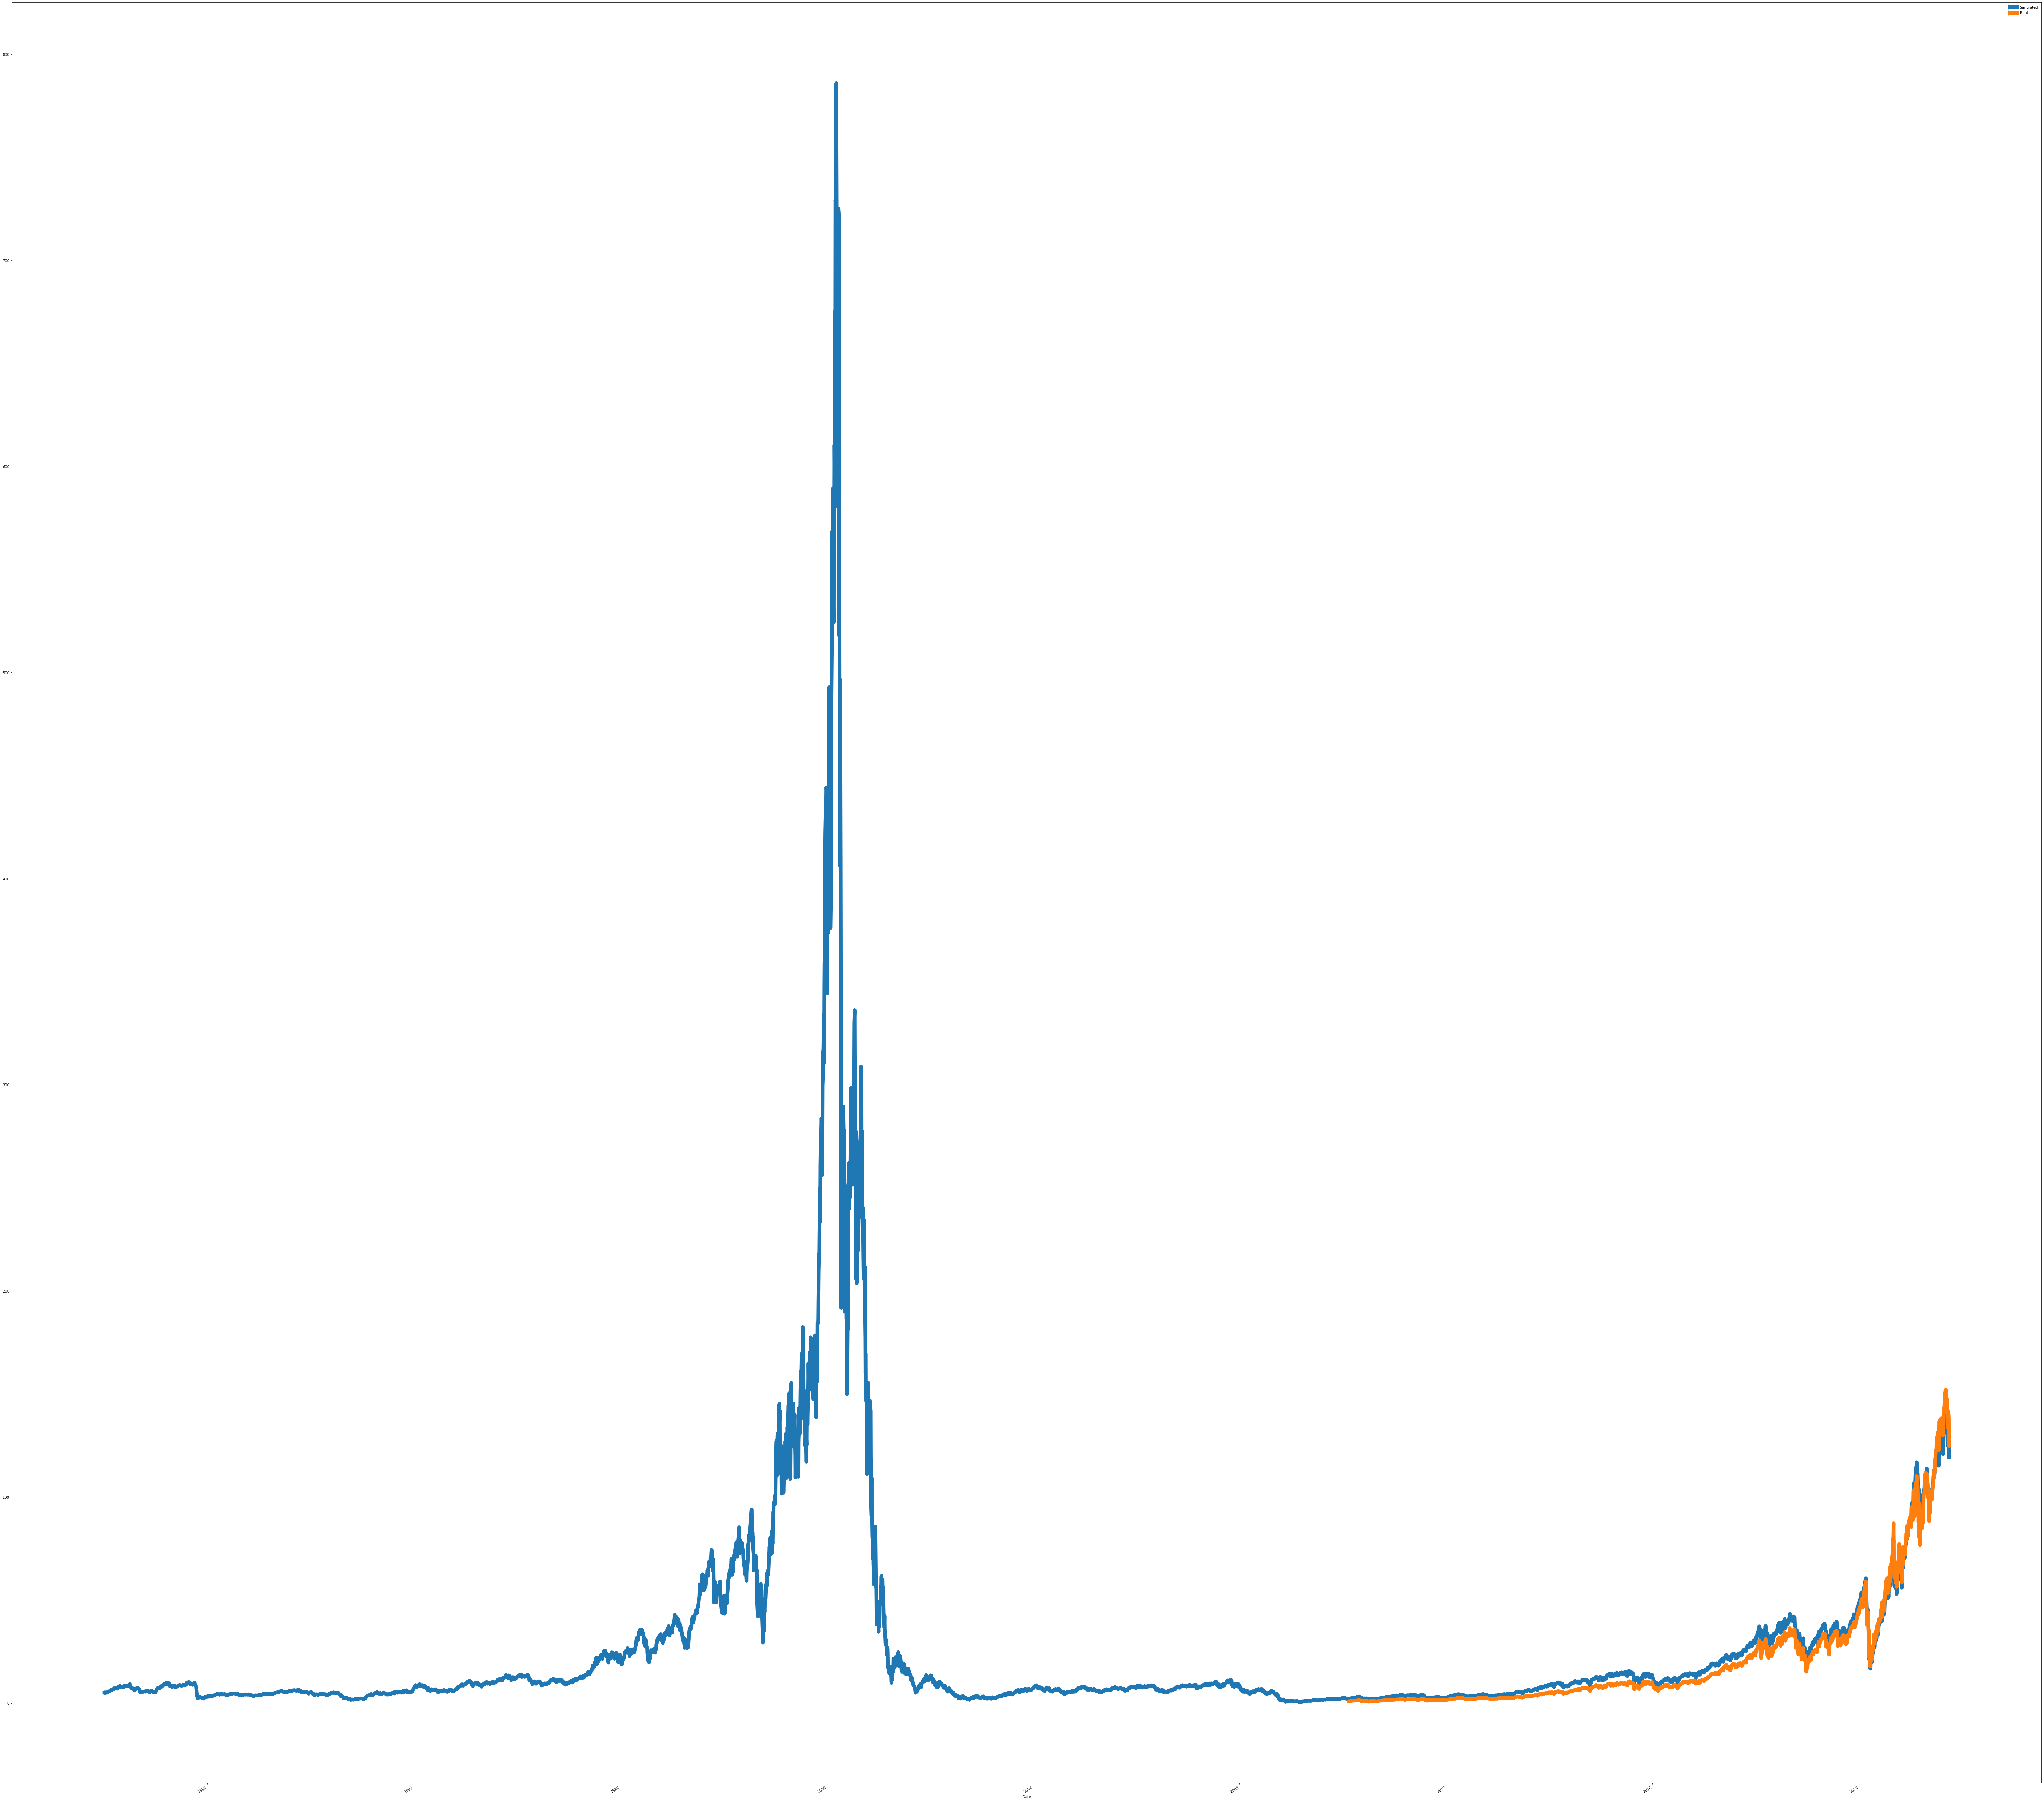

In [6]:
tqqq_graph = df_tqqq_sim_compound["Investment"]
tqqq_graph.plot(legend=True, label="Simulated", figsize=(100,100), lw=10)
tqqq_real = df_tqqq_real["Close"];
tqqq_real.plot(legend=True, label="Real",  figsize=(100,100), lw=10);

<AxesSubplot:xlabel='Date'>

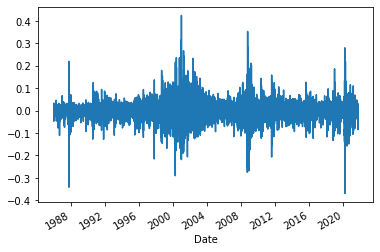

In [7]:
tqqq_pct_graph = df_tqqq_sim["Close"]
tqqq_pct_graph.plot()

In [8]:
df_tqqq_sim_compound['EMA50'] = df_tqqq_sim_compound['Investment'].ewm(span=50, adjust=False).mean()
df_tqqq_sim_compound['EMA200'] = df_tqqq_sim_compound['Investment'].ewm(span=200, adjust=False).mean()

<AxesSubplot:xlabel='Date'>

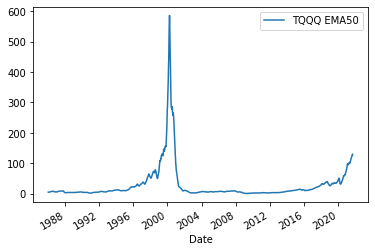

In [9]:
tqqq_ema50_graph = df_tqqq_sim_compound["EMA50"]
tqqq_ema50_graph.plot(legend=True, label="TQQQ EMA50")

<AxesSubplot:xlabel='Date'>

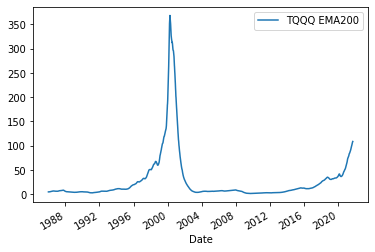

In [10]:
tqqq_ema200_graph = df_tqqq_sim_compound["EMA200"]
tqqq_ema200_graph.plot(legend=True, label="TQQQ EMA200")

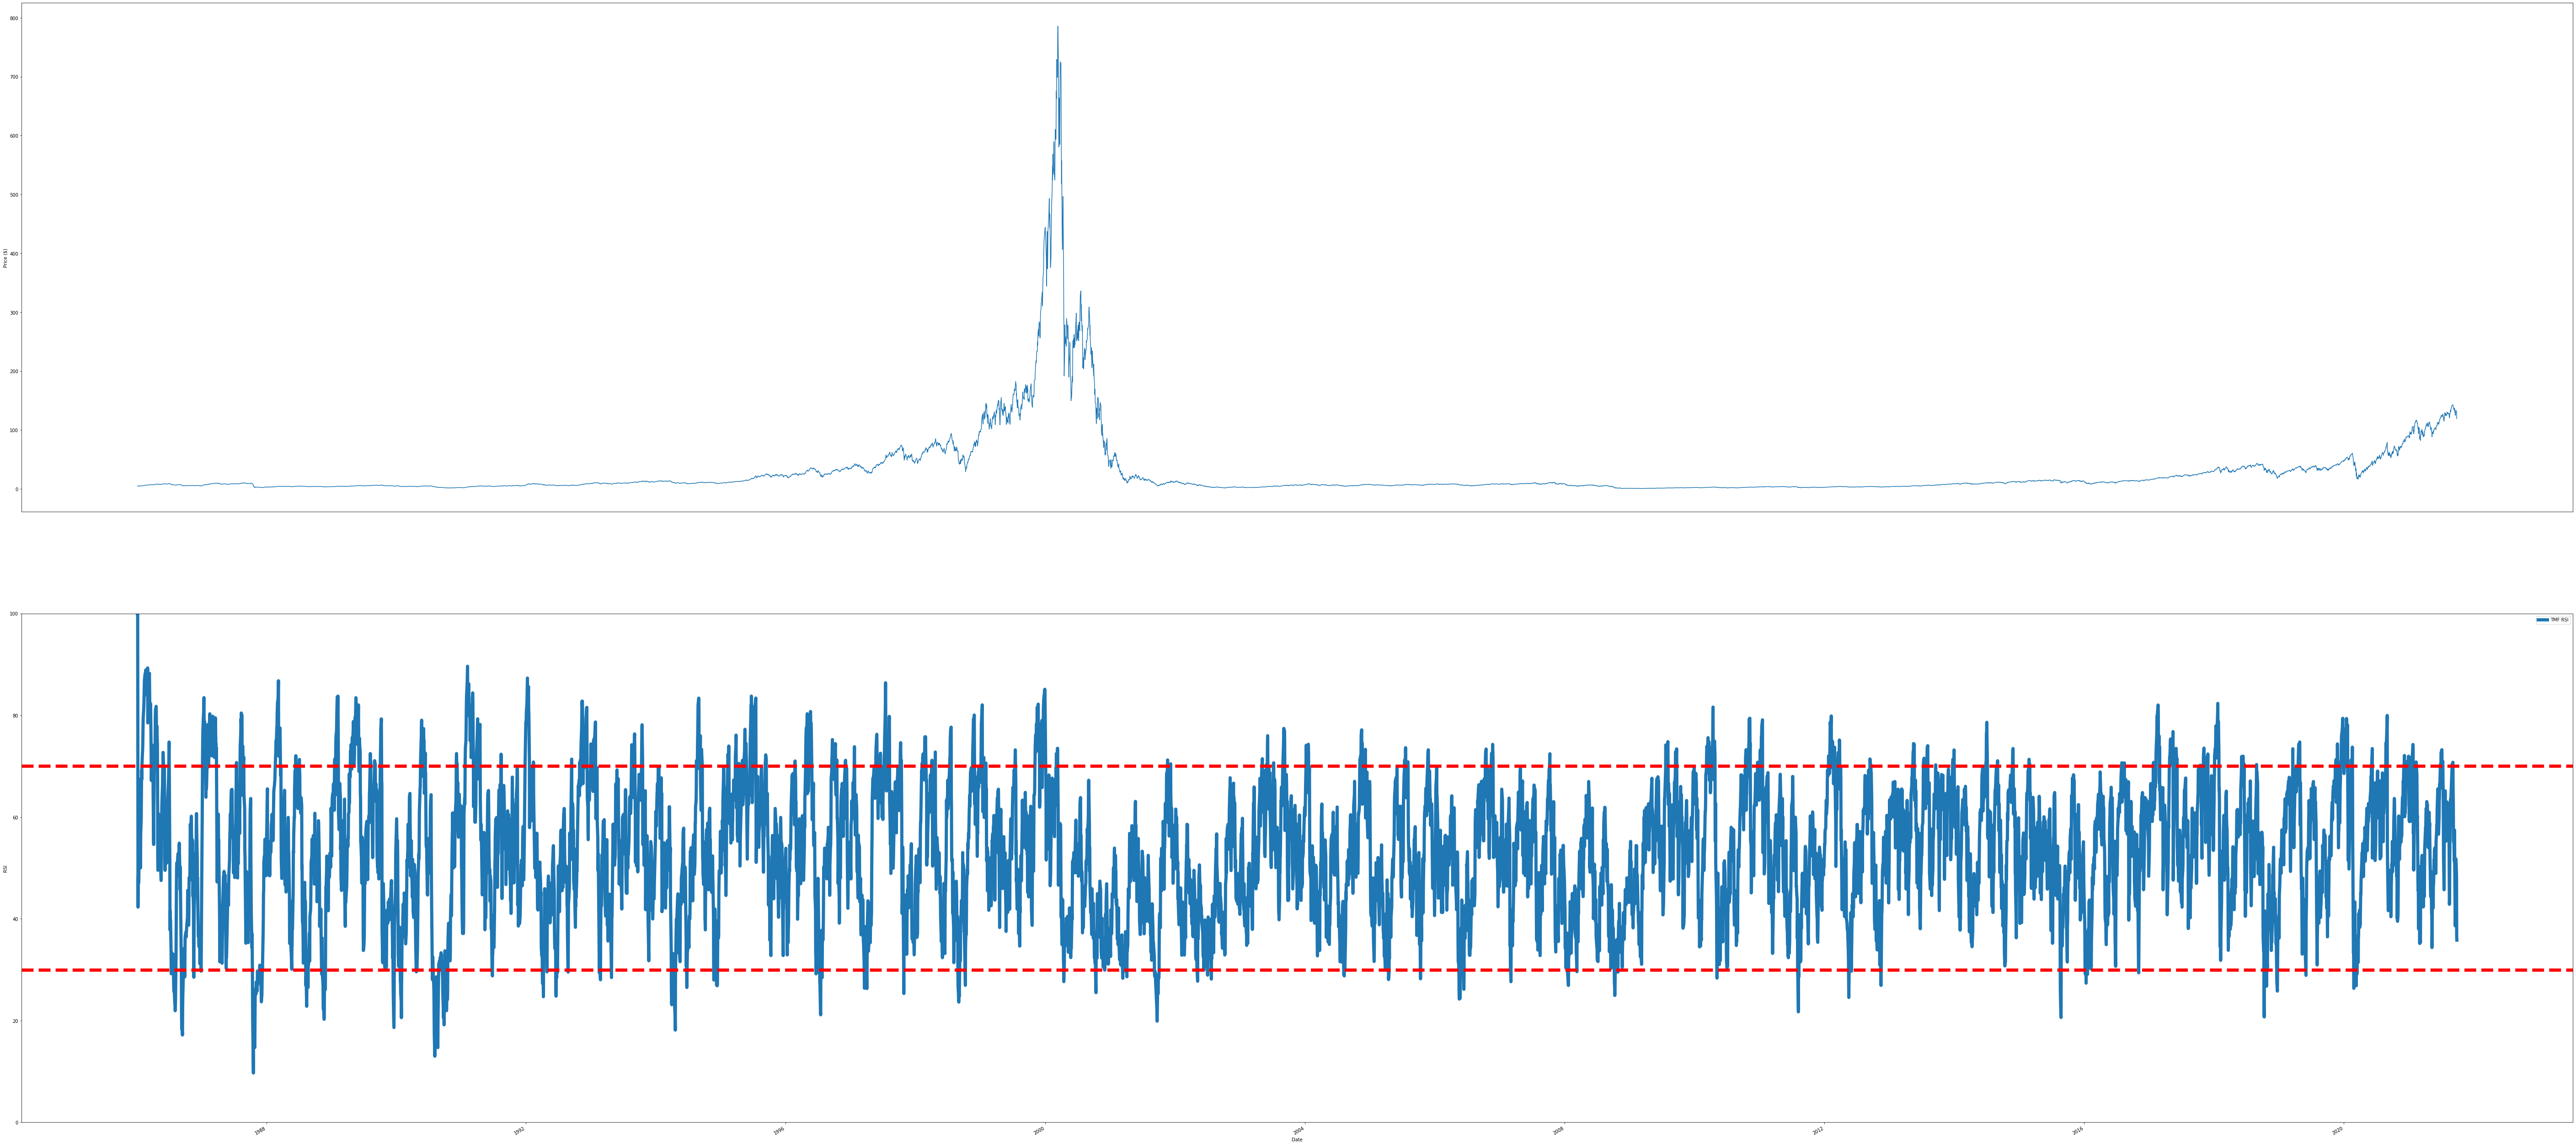

In [11]:
delta = df_tqqq_sim_compound['Investment'].diff()
up = delta.clip(lower=0)
down = -1*delta.clip(upper=0)
ema_up = up.ewm(com=14, adjust=False).mean()
ema_down = down.ewm(com=14, adjust=False).mean()
rs = ema_up/ema_down

df_tqqq_sim_compound['RSI'] = 100 - (100/(1 + rs))


fig, (ax1, ax2) = plt.subplots(2)
ax1.get_xaxis().set_visible(False)

df_tqqq_sim_compound['Investment'].plot(ax=ax1)
ax1.set_ylabel('Price ($)')
df_tqqq_sim_compound['RSI'].plot(ax=ax2, legend=True, label="TMF RSI", figsize=(100, 50), lw=7)
ax2.set_ylim(0,100)
ax2.axhline(30, color='r', linestyle='--', lw=7)
ax2.axhline(70, color='r', linestyle='--', lw=7)
ax2.set_ylabel('RSI')

plt.show()